# Picnic Hackathon 🥇✅💯
 **When great customer support meets data**


## Why the challenge?
One of our core beliefs is to offer our customers the best support possible, by allowing them, for example, to send in pictures of defect products they wish to be reimbursed for. But processing these pictures is very time-consuming as it is all done manually.

## What is the challenge?
The challenge we propose is the following: As a first step in helping customer support, come up with a way of labeling every picture that comes in according to the product that is in the picture. To keep with the Picnic spirit, we encourage to be as innovative and creative with your solutions as possible.

## Dataset
To that end, we offer the following [dataset](https://github.com/Younes-Charfaoui/Picnic-Hackathon/blob/master/images/picnic_logo.png) of pictures of defect items.

## Setting & Imports

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from keras.models import Sequential
from keras.layers import Dropout,Conv2D, MaxPooling2D, Activation, Dense, Flatten
from keras_preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from google.colab import drive
import glob
import os
import cv2

Using TensorFlow backend.


In [4]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path_to_folder = 'gdrive/My Drive/Dataset/The Picnic Hackathon 2019/'

In [0]:
df = pd.read_csv(path_to_folder + "train.tsv",  sep='\t')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


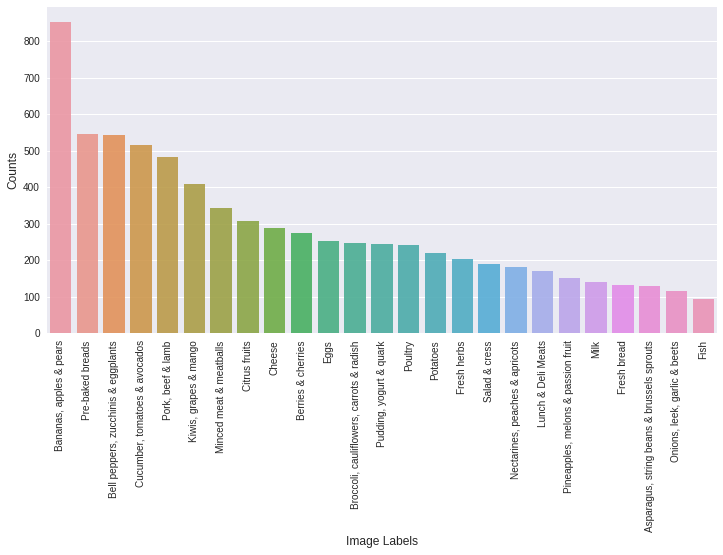

In [7]:
# getting the count of each class
label_counts = df.label.value_counts()
plt.figure(figsize = (12,6))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Image Labels', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

In [0]:
"""datagen = ImageDataGenerator(rescale=1./255, 
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.01,
                             zoom_range=[0.9, 1.25],
                             horizontal_flip= True,
                             vertical_flip= True,
                             fill_mode='reflect',
                             data_format='channels_last',
                             brightness_range=[0.5, 1.5],
                             validation_split = 0.2)"""
datagen = ImageDataGenerator(rescale=1./255, 
                             validation_split = 0.3)

In [0]:
test = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = datagen.flow_from_dataframe(dataframe=df, directory= "gdrive/My Drive/train/", 
                                              x_col= "file", y_col= "label", 
                                              class_mode= "categorical", 
                                              target_size= (224,224), 
                                              batch_size= 32,
                                              subset = 'training')

valid_generator = datagen.flow_from_dataframe(dataframe=df, directory= "gdrive/My Drive/train/", 
                                              x_col= "file", y_col= "label", 
                                              class_mode= "categorical", 
                                              target_size= (224,224), 
                                              batch_size= 32,
                                              subset = 'validation')

Found 5080 images belonging to 25 classes.
Found 2177 images belonging to 25 classes.


In [0]:
step_epochs = train_generator.n // train_generator.batch_size

step_validation = valid_generator.n // valid_generator.batch_size

In [0]:
test_generator = datagen.flow_from_directory(directory= path_to_folder +  "test/",
                                              class_mode= "categorical", 
                                              target_size= (224,224), 
                                              batch_size= 32)

Found 0 images belonging to 0 classes.


In [0]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}

In [12]:
print(labels)

{0: 'Asparagus, string beans & brussels sprouts', 1: 'Bananas, apples & pears', 2: 'Bell peppers, zucchinis & eggplants', 3: 'Berries & cherries', 4: 'Broccoli, cauliflowers, carrots & radish', 5: 'Cheese', 6: 'Citrus fruits', 7: 'Cucumber, tomatoes & avocados', 8: 'Eggs', 9: 'Fish', 10: 'Fresh bread', 11: 'Fresh herbs', 12: 'Kiwis, grapes & mango', 13: 'Lunch & Deli Meats', 14: 'Milk', 15: 'Minced meat & meatballs', 16: 'Nectarines, peaches & apricots', 17: 'Onions, leek, garlic & beets', 18: 'Pineapples, melons & passion fruit', 19: 'Pork, beef & lamb', 20: 'Potatoes', 21: 'Poultry', 22: 'Pre-baked breads', 23: 'Pudding, yogurt & quark', 24: 'Salad & cress'}


In [0]:
"""X_list, y_list = [], []
size = train_generator.n//train_generator.batch_size
print(size)
for i in range(train_generator.n//train_generator.batch_size):
  print(i)
  X, y = train_generator.next()
  X_list.append(X)
  y_list.append(y)"""
  

In [0]:
# X_test, y_test = valid_generator.next()

In [0]:
"""from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, = train_test_split(X, y, shuffle = True, test_size = 0.3)"""

In [13]:
X, y = train_generator.next()

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:885: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


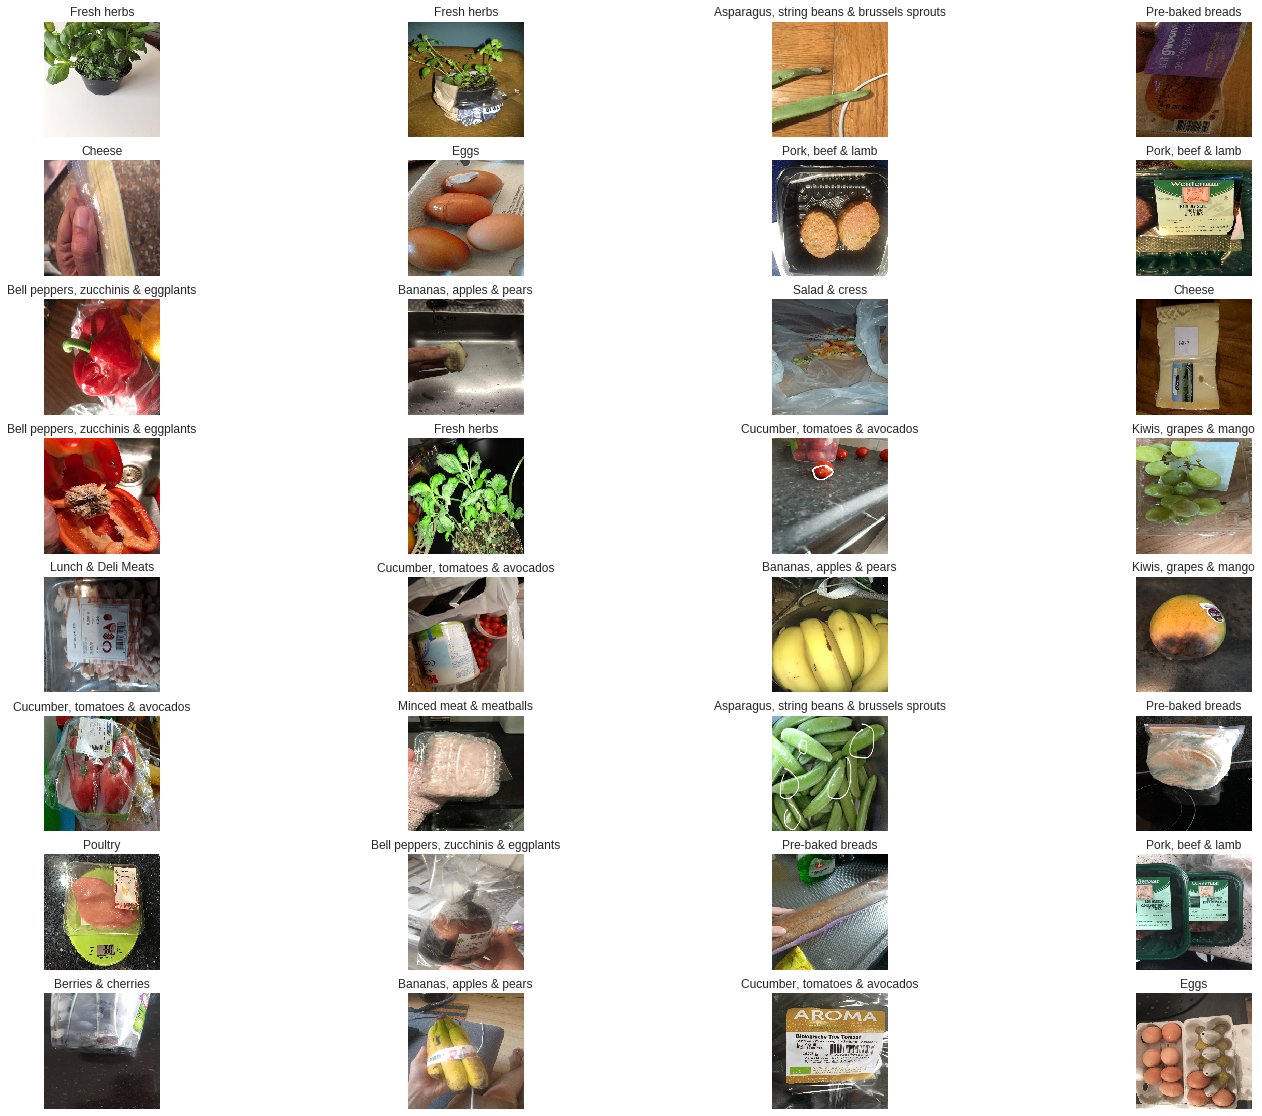

In [14]:
fig = plt.figure(figsize = (25,20))
for i in range(32):
  ax = fig.add_subplot(8,4, i+1, xticks = [], yticks = [])
  ax.imshow(X[i])
  ax.set_title(labels[np.argmax(y[i])])

## Building & Testing Model

In [0]:
# helper functions 
def train_model(model, epochs, name = "model", generator = True):
  early_stopping = EarlyStopping(patience=9)
  checkpointer = ModelCheckpoint(name + 'best.h5', monitor='val_acc', verbose=1, save_best_only=True)
  if generator:
    history = model.fit_generator(train_generator, epochs= epochs, 
                                  steps_per_epoch= step_epochs, 
                                  validation_steps=step_validation, 
                                  validation_data = valid_generator, 
                                  callbacks=[early_stopping, checkpointer])
  else:
    history = model.fit(x_train, y_train, epochs= epochs, batch_size = 32, 
                        validation_data= (x_test,y_test),
                       callbacks=[early_stopping, checkpointer])
  model.load_weights(name + 'best.h5')
  score = model.evaluate_generator(valid_generator, steps = step_validation)
  print('Accuracy of {}%'.format(score[1]*100))
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Losses')
  plt.legend()
  plt.show()
  plt.plot(history.history['acc'], label='Training acc')
  plt.plot(history.history['val_acc'], label='Validation acc')
  plt.legend()
  plt.title('Accuracies')
  plt.show()

In [0]:
def train_model_fast(model, epochs, generator = True):
  if generator:
    history = model.fit_generator(train_generator, epochs= epochs, steps_per_epoch= step_epochs)
  else:
    history = model.fit(x_train, y_train, epochs= epochs, batch_size = 32)
  score = model.evaluate_generator(valid_generator, steps = step_validation)
  print('Accuracy of Validation was {}%'.format(score[1]*100))
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['acc'], label='Training acc')
  plt.title('Results')
  plt.legend()
  plt.show()

In [0]:
# Building simple model
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='softmax'))
model.summary()

In [0]:
train_model(model, 10)

In [0]:
# Building some complex models
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), padding= 'same', input_shape = (224,224,3), activation = 'relu'))
model.add(Conv2D(16, kernel_size = (3,3), padding= 'same', activation = 'relu'))
model.add(Conv2D(16, kernel_size = (3,3), padding= 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(32, kernel_size = (3,3), padding= 'same', activation = 'relu'))
model.add(Conv2D(32, kernel_size = (3,3), padding= 'same', activation = 'relu'))
model.add(Conv2D(32, kernel_size = (3,3), padding= 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(64, kernel_size = (3,3), padding= 'same', activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), padding= 'same', activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), padding= 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(128, kernel_size = (3,3), padding= 'same', activation = 'relu'))
model.add(Conv2D(128, kernel_size = (3,3), padding= 'same', activation = 'relu'))
model.add(Conv2D(128, kernel_size = (3,3), padding= 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))

model.add(Flatten())
model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation = 'softmax'))
model.summary()

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop' , metrics = ['accuracy'])

In [0]:
train_model(model, 5)

## Transfer Learning

In [0]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.nasnet import NASNetLarge
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16
from keras.applications.xception import Xception
from keras.applications.resnet50 import ResNet50
from keras.applications.nasnet import NASNetMobile
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.densenet import DenseNet121, DenseNet169, DenseNet201 

## Summary of Pre-Trained Model

In [0]:
# helper function to visualize models 
def show_model(name, weight = 'imagenet', pool = 'avg'):
  
  if name == 'resnet':
    model = ResNet50(include_top=False, weights= weight, pooling= pool)
  if name == 'xception':
    model = Xception(include_top=False, weights= weight, pooling= pool)
  elif name == 'mobilenet':
    model = MobileNetV2(include_top=False, weights= weight, pooling= pool)
  elif name == 'nasnet':
    model = NASNetMobile(include_top=False, weights= weight, pooling= pool)
  elif name == 'nasnet_large':
    model = NASNetLarge(include_top = False, weights= weight, input_shape=(224,224,3), pooling = pool)
  elif name == 'densenet121':
    
    model = DenseNet121(include_top=False, weights= weight, pooling= pool)
    for layer in model.layers[:-115]:
        layer.trainable = False
  elif name == 'densenet169':
    model = DenseNet169(include_top=False, weights= weight, pooling= pool)
  elif name == 'densenet201':
    model = DenseNet201(include_top=False, weights= weight, pooling= pool)
  elif name == 'vgg16':
    model = VGG16(include_top=False, weights= weight, pooling= pool)
  elif name == 'vgg19':
    model = VGG19(include_top=False, weights= weight, pooling= pool)
  elif name == 'inception_v3':
    model = InceptionV3(include_top = False, weights= weight, input_shape=(224,224,3), pooling = pool)
  elif name == 'inception_resnet_v3':
    model = InceptionResNetV2(include_top = False, weights= weight, input_shape=(224,224,3), pooling = pool)
  
  for layer in model.layers:
      
      print("{}, {}".format(layer, layer.trainable))
  model.summary()

## Training of Model

In [0]:
# helper method to freeze a model
def freeze_model(model, freeze):
    if freeze:
      for layer in model.layers:
          layer.trainable = False
    return model

In [0]:
# helper function to creat models 
def make_model(name, weight = 'imagenet', freeze = False, pool = 'avg'):
  model = Sequential()
  if name == 'resnet':      
    model.add(freeze_model(ResNet50(include_top=False, weights= weight, pooling= pool), freeze))
  if name == 'xception':
    model.add(freeze_model(Xception(include_top=False, weights= weight, pooling= pool), freeze))
  elif name == 'mobilenet':
    model.add(freeze_model(MobileNetV2(include_top=False, weights= weight, pooling= pool), freeze))
  elif name == 'densenet121':
    dense = DenseNet121(include_top=False, weights= weight, pooling= pool)
    model.add(freeze_model(dense, freeze))
  elif name == 'densenet169':
    model.add(freeze_model(DenseNet169(include_top=False, weights= weight, pooling= pool), freeze))
  elif name == 'densenet201':
    model.add(freeze_model(DenseNet201(include_top=False, weights= weight, pooling= pool), freeze))
  elif name == 'vgg16':
    vgg_conv = VGG16(include_top=False, weights= weight, pooling= pool)
    model.add(freeze_model(vgg_conv, freeze))
  elif name == 'vgg19':
    model.add(freeze_model(VGG19(include_top=False, weights= weight, pooling= pool), freeze))
  elif name == 'inception_v3':
    incpetion = InceptionV3(include_top = False, weights= weight, input_shape=(224,224,3), pooling = pool)
    model.add(freeze_model(incpetion, freeze))
  elif name == 'inception_resnet_v3':
    model.add(freeze_model(InceptionResNetV2(include_top = False, weights= weight, input_shape=(224,224,3), pooling = pool), freeze))
  elif name == 'nasnet':
    model.add(freeze_model(NASNetMobile(include_top=False, weights= weight, pooling= pool), freeze))
  elif name == 'nasnet_large':
    model.add(freeze_model(NASNetLarge(include_top = False, weights= weight, input_shape=(224,224,3), pooling = pool), freeze))
  
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(512, activation = 'relu'))
  model.add(Dropout(0.25))
  model.add(Dense(25, activation = 'softmax'))
  model.summary()
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])
  
  return model   

In [0]:
models = ['resnet' , 'mobilenet', 'nasnet', 'densenet121', 'densenet169', 'densenet201', 'vgg16', 'vgg19', 'inception_resnet_v3', 'inception_v3', 'nasnet_large', 'xception']

In [0]:
model = make_model('resnet', freeze = True)

Epoch 1/30


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:885: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


158/158 [==============================] - 164s 1s/step - loss: 1.6025 - acc: 0.5202
Epoch 2/30
158/158 [==============================] - 162s 1s/step - loss: 1.3793 - acc: 0.5871
Epoch 3/30
158/158 [==============================] - 165s 1s/step - loss: 1.2281 - acc: 0.6330
Epoch 4/30
158/158 [==============================] - 166s 1s/step - loss: 1.0996 - acc: 0.6752
Epoch 5/30
158/158 [==============================] - 161s 1s/step - loss: 1.0097 - acc: 0.6905
Epoch 6/30
158/158 [==============================] - 164s 1s/step - loss: 0.9263 - acc: 0.7184
Epoch 7/30
158/158 [==============================] - 164s 1s/step - loss: 0.8533 - acc: 0.7395
Epoch 8/30
158/158 [==============================] - 162s 1s/step - loss: 0.7926 - acc: 0.7534
Epoch 9/30
158/158 [==============================] - 164s 1s/step - loss: 0.7279 - acc: 0.7800
Epoch 10/30
158/158 [==============================] - 164s 1s/step - loss: 0.6714 - acc: 0.7921
Epoch 11/30
158/158 [=============================

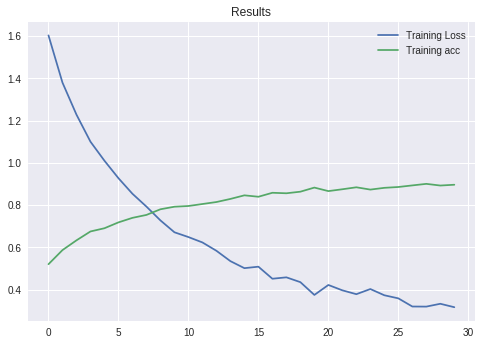

In [24]:
train_model_fast(model , 30)

In [0]:
model = make_model('resnet', pool= 'max')
train_model(model , 5)

In [52]:
model = make_model('mobilenet', freeze = True)

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:295: UserWarning: MobileNet shape is undefined. Weights for input shape(224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


9412608/9406464 [==============================] - 0s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 1280)              2257984   
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              1311744   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 25)                12825     
Total params: 4,107,353
Trainable params: 1,849,369
Non-trainable params: 2,257

Epoch 1/30


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:885: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


158/158 [==============================] - 161s 1s/step - loss: 2.2204 - acc: 0.3694
Epoch 2/30
158/158 [==============================] - 156s 987ms/step - loss: 1.5487 - acc: 0.5454
Epoch 3/30
158/158 [==============================] - 158s 1s/step - loss: 1.3437 - acc: 0.5980
Epoch 4/30
158/158 [==============================] - 154s 972ms/step - loss: 1.1674 - acc: 0.6437
Epoch 5/30
158/158 [==============================] - 160s 1s/step - loss: 1.0751 - acc: 0.6801
Epoch 6/30
158/158 [==============================] - 154s 973ms/step - loss: 1.0163 - acc: 0.6941
Epoch 7/30
158/158 [==============================] - 157s 991ms/step - loss: 0.9117 - acc: 0.7161
Epoch 8/30
158/158 [==============================] - 156s 986ms/step - loss: 0.8677 - acc: 0.7333
Epoch 9/30
158/158 [==============================] - 157s 992ms/step - loss: 0.7778 - acc: 0.7554
Epoch 10/30
158/158 [==============================] - 155s 982ms/step - loss: 0.7499 - acc: 0.7675
Epoch 11/30
158/158 [========

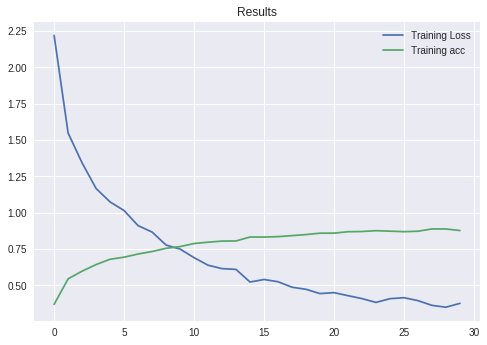

In [53]:
train_model_fast(model, 30)

In [71]:
model = make_model('nasnet', freeze = True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Model)               (None, 1056)              4269716   
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              1082368   
_________________________________________________________________
dropout_9 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 25)                12825     
Total params: 5,889,709
Trainable params: 1,619,993
Non-trainable params: 4,269,716
__________________________________________________________

Epoch 1/30


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:885: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


158/158 [==============================] - 186s 1s/step - loss: 2.2747 - acc: 0.3505
Epoch 2/30
158/158 [==============================] - 162s 1s/step - loss: 1.7090 - acc: 0.4941
Epoch 3/30
158/158 [==============================] - 160s 1s/step - loss: 1.5479 - acc: 0.5441
Epoch 4/30
158/158 [==============================] - 157s 993ms/step - loss: 1.4120 - acc: 0.5712
Epoch 5/30
158/158 [==============================] - 163s 1s/step - loss: 1.3175 - acc: 0.6092
Epoch 6/30
158/158 [==============================] - 160s 1s/step - loss: 1.2774 - acc: 0.6131
Epoch 7/30
158/158 [==============================] - 161s 1s/step - loss: 1.1593 - acc: 0.6487
Epoch 8/30
158/158 [==============================] - 160s 1s/step - loss: 1.1546 - acc: 0.6436
Epoch 9/30
158/158 [==============================] - 156s 986ms/step - loss: 1.0671 - acc: 0.6713
Epoch 10/30
158/158 [==============================] - 165s 1s/step - loss: 1.0198 - acc: 0.6862
Epoch 11/30
158/158 [=======================

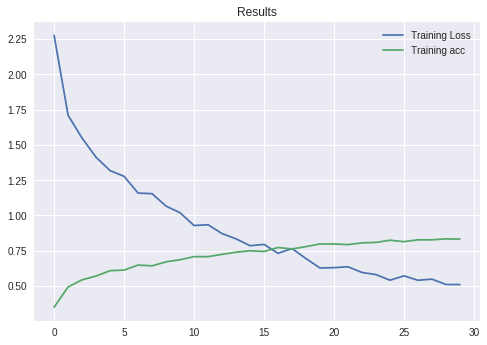

In [72]:
train_model_fast(model, 30)

In [117]:
model = make_model('densenet121', freeze = True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 1024)              7037504   
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_11 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 25)                12825     
Total params: 8,624,729
Trainable params: 1,587,225
Non-trainable params: 7,037,504
__________________________________________________________

Epoch 1/30


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:885: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


158/158 [==============================] - 218s 1s/step - loss: 2.2484 - acc: 0.3656
Epoch 2/30
158/158 [==============================] - 164s 1s/step - loss: 1.5739 - acc: 0.5389
Epoch 3/30
158/158 [==============================] - 166s 1s/step - loss: 1.3777 - acc: 0.5937
Epoch 4/30
158/158 [==============================] - 159s 1s/step - loss: 1.2149 - acc: 0.6284
Epoch 5/30
158/158 [==============================] - 168s 1s/step - loss: 1.1427 - acc: 0.6584
Epoch 6/30
158/158 [==============================] - 162s 1s/step - loss: 1.0191 - acc: 0.6827
Epoch 7/30
158/158 [==============================] - 167s 1s/step - loss: 1.0281 - acc: 0.6845
Epoch 8/30
158/158 [==============================] - 167s 1s/step - loss: 0.9262 - acc: 0.7164
Epoch 9/30
158/158 [==============================] - 159s 1s/step - loss: 0.8981 - acc: 0.7246
Epoch 10/30
158/158 [==============================] - 169s 1s/step - loss: 0.8569 - acc: 0.7360
Epoch 11/30
158/158 [=============================

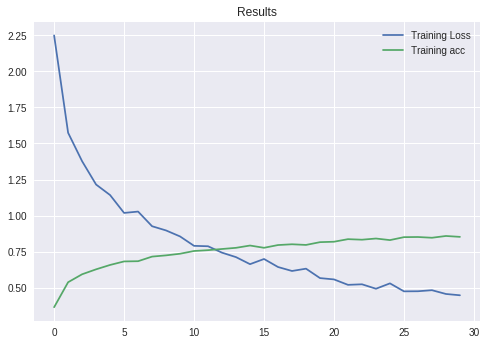

In [118]:
train_model_fast(model, 30)

In [33]:
model = make_model('xception', freeze = True)

83689472/83683744 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 2048)              20861480  
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 25)                12825     
Total params: 23,497,281
Trainable params: 2,635,801
Non-trainable params: 20

Epoch 1/30


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:885: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


158/158 [==============================] - 171s 1s/step - loss: 2.3153 - acc: 0.3486
Epoch 2/30
158/158 [==============================] - 164s 1s/step - loss: 1.6664 - acc: 0.5188
Epoch 3/30
158/158 [==============================] - 169s 1s/step - loss: 1.4127 - acc: 0.5900
Epoch 4/30
158/158 [==============================] - 166s 1s/step - loss: 1.2339 - acc: 0.6437
Epoch 5/30
158/158 [==============================] - 170s 1s/step - loss: 1.1314 - acc: 0.6557
Epoch 6/30
158/158 [==============================] - 163s 1s/step - loss: 1.0208 - acc: 0.6847
Epoch 7/30
158/158 [==============================] - 167s 1s/step - loss: 0.9599 - acc: 0.7128
Epoch 8/30
158/158 [==============================] - 170s 1s/step - loss: 0.8618 - acc: 0.7398
Epoch 9/30
158/158 [==============================] - 166s 1s/step - loss: 0.7834 - acc: 0.7656
Epoch 10/30
158/158 [==============================] - 165s 1s/step - loss: 0.7043 - acc: 0.7832
Epoch 11/30
158/158 [=============================

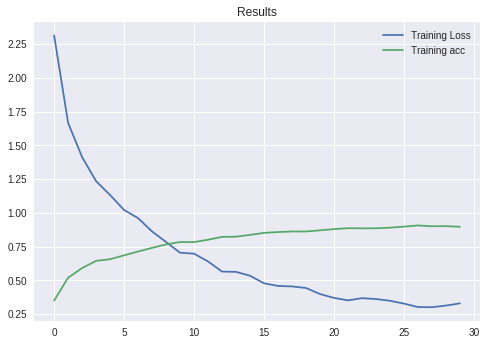

In [34]:
train_model_fast(model, 30)

In [139]:
model = make_model('densenet169', freeze = True)

51879936/51877672 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet169 (Model)          (None, 1664)              12642880  
_________________________________________________________________
dense_19 (Dense)             (None, 1024)              1704960   
_________________________________________________________________
dropout_13 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 25)                12825     
Total params: 14,885,465
Trainable params: 2,242,585
Non-trainable params: 12

Epoch 1/30


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:885: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


158/158 [==============================] - 248s 2s/step - loss: 2.2316 - acc: 0.3699
Epoch 2/30
158/158 [==============================] - 171s 1s/step - loss: 1.4800 - acc: 0.5629
Epoch 3/30
158/158 [==============================] - 169s 1s/step - loss: 1.2616 - acc: 0.6216
Epoch 4/30
158/158 [==============================] - 166s 1s/step - loss: 1.1273 - acc: 0.6629
Epoch 5/30
158/158 [==============================] - 168s 1s/step - loss: 1.0012 - acc: 0.6946
Epoch 6/30
158/158 [==============================] - 168s 1s/step - loss: 0.9153 - acc: 0.7164
Epoch 7/30
158/158 [==============================] - 167s 1s/step - loss: 0.8752 - acc: 0.7355
Epoch 8/30
158/158 [==============================] - 167s 1s/step - loss: 0.8040 - acc: 0.7516
Epoch 9/30
158/158 [==============================] - 169s 1s/step - loss: 0.7831 - acc: 0.7579
Epoch 10/30
158/158 [==============================] - 167s 1s/step - loss: 0.7382 - acc: 0.7721
Epoch 11/30
158/158 [=============================

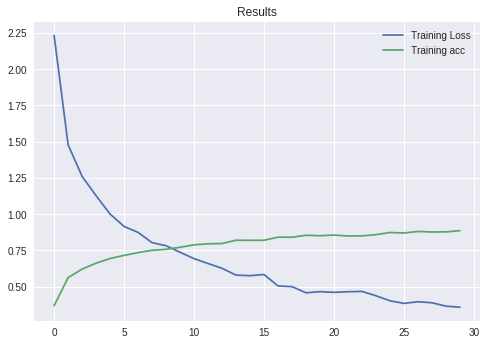

In [140]:
train_model_fast(model , 30)

In [23]:
model = make_model('densenet201', freeze = True)

74842112/74836368 [==============================] - 1s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Model)          (None, 1920)              18321984  
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1967104   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)             

Epoch 1/1


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:885: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


158/158 [==============================] - 168s 1s/step - loss: 0.5068 - acc: 0.8359
Accuracy of Validation was 68.1118881118881%


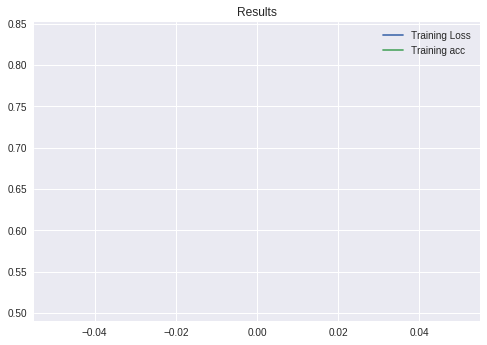

In [26]:
train_model_fast(model, 1)

In [0]:
model.save_weights("densenet.model.h5")

In [0]:
# serialize model to JSON
model_json = model.to_json()
with open("densnetmodel.json", "w") as json_file:
    json_file.write(model_json)

In [0]:
score = model.evaluate_generator(valid_generator, steps = step_validation)

## Exporting Results

In [0]:
files = glob.glob(path_to_folder + 'test/*')

In [28]:
results = []
i = 0
for file in files:
    print(i)
    i+=1
    img = cv2.imread(file,1)
    img = cv2.resize(img, (224, 224))
    img = img/255
    result = model.predict([[img]])
    label = labels[np.argmax(result)]
    filename = os.path.basename(file)
    results.append([filename, label])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [0]:
headers = ['file', 'label']
df = pd.DataFrame(results, columns=headers)

In [0]:
df = df.sort_values(['file'])

In [32]:
df.head()

,file,label
503,7263.jpeg,"Cucumber, tomatoes & avocados"
520,7264.jpeg,Eggs
571,7265.jpeg,"Broccoli, cauliflowers, carrots & radish"
332,7266.png,Eggs
513,7267.jpeg,Milk


In [0]:
df.to_csv("densnet209_avg_30epoch_68_.tsv", sep ='\t', index = False)

In [0]:
model.save_weights(path_to_folder + 'pinic_densnet209_avg_30epoch_68.h5')